In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [200]:
df = pd.read_csv("dataset/customer_shopping_data.csv")

In [201]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [203]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [204]:
df.duplicated().sum()

0

In [205]:
# Droping the incoice_no column because we will not use it in analysis
df.drop(columns=['invoice_no'], inplace= True)

In [206]:
df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [207]:
# Setting the customer_id as index for this dataset
df.set_index('customer_id', inplace=True)

In [208]:
df

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
customer_id,,,,,,,,
C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


In [209]:
# Changing the datatype of the invoice_date column from object to dateTime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

In [210]:
# adding (year, month) columns. Maybe we will use them in analysis
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month

In [211]:
df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
customer_id,,,,,,,,,,
C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99457 entries, C241288 to C273973
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gender          99457 non-null  object        
 1   age             99457 non-null  int64         
 2   category        99457 non-null  object        
 3   quantity        99457 non-null  int64         
 4   price           99457 non-null  float64       
 5   payment_method  99457 non-null  object        
 6   invoice_date    99457 non-null  datetime64[ns]
 7   shopping_mall   99457 non-null  object        
 8   year            99457 non-null  int32         
 9   month           99457 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(4)
memory usage: 7.6+ MB


In [213]:
#gender count
gender_count = df['gender'].value_counts()
gender_count

gender
Female    59482
Male      39975
Name: count, dtype: int64

C:\Users\krish\AppData\Local\Temp\ipykernel_19156\3752212728.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




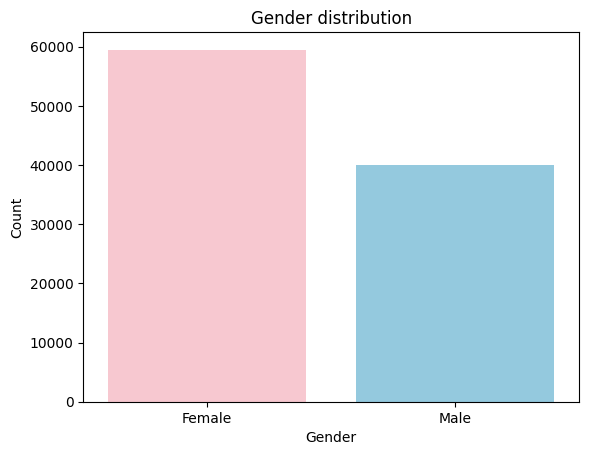

In [216]:
sns.countplot(x='gender', data = df,palette=['pink','skyblue'])
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [217]:
def gender_distribution_px(df):
    return px.bar(gender_count,
                title='Gender distribution',
                text_auto=True,
                labels=dict(index='gender', value='count'),
                color_discrete_sequence=[['#FF69B4', '#87CEEB']]).update_xaxes(type='category')

In [218]:
gender_distribution_px(df)

In [219]:
# another plot for gender distribution using plotly just for practice
px.bar(gender_count,
             title='Gender distribution',
             text_auto=True,
             labels=dict(index='gender', value='count'),
             color_discrete_sequence=[['#FF69B4', '#87CEEB']]).update_xaxes(type='category')

In [220]:
df.describe()

,age,quantity,price,invoice_date,year,month
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,2021.629408,6.113898
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,2021.000000,1.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,2021.000000,3.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,2022.000000,6.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,2022.000000,9.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,2023.000000,12.000000
std,14.990054,1.413025,941.184567,NaN,0.636136,3.569511


In [221]:
#age count
age_count = df['age'].value_counts().sort_index()
age_count

age
18    1844
19    1936
20    1844
21    1947
22    2051
23    1897
24    1977
25    1863
26    1896
27    1950
28    1953
29    1885
30    1981
31    1866
32    1891
33    1913
34    1883
35    1841
36    1954
37    2057
38    1954
39    1947
40    1960
41    1892
42    1892
43    2000
44    1904
45    1876
46    1911
47    1880
48    1955
49    1883
50    1873
51    1993
52    1945
53    1903
54    1830
55    1843
56    1916
57    1879
58    1875
59    1874
60    1874
61    1945
62    1909
63    1886
64    2002
65    1856
66    1876
67    1901
68    1893
69    1901
Name: count, dtype: int64

In [222]:
max_age = df.nlargest(1,'age')
max_age

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
customer_id,,,,,,,,,,
C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity,2021,11


In [223]:
min_age = df.nsmallest(1,'age')
min_age

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
customer_id,,,,,,,,,,
C126436,Male,18,Cosmetics,3,121.98,Debit Card,2022-02-07,Zorlu Center,2022,2


In [224]:
# getting mean age by gender
gender_age = df.groupby('gender')['age'].mean().reset_index()

In [225]:
gender_age

,gender,age
0,Female,43.453515
1,Male,43.387767


C:\Users\krish\AppData\Local\Temp\ipykernel_19156\2050938253.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




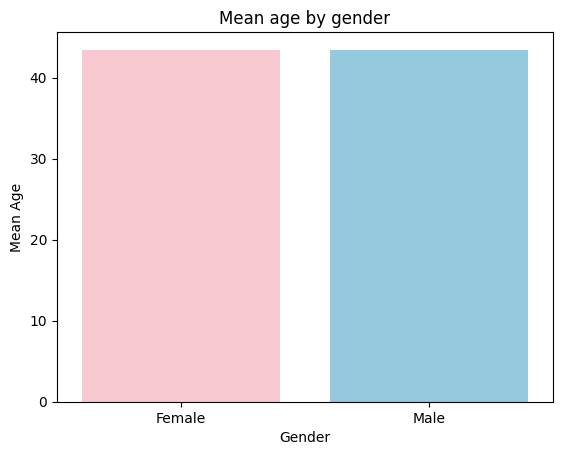

In [228]:
sns.barplot(x= 'gender', y = 'age', data = gender_age, palette=['pink','skyblue'])
plt.title('Mean age by gender')
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.show()

In [229]:
def mean_age(df):
    return px.bar(gender_age, x='gender', y='age', color='gender',
             color_discrete_sequence=['pink', 'skyblue'],
             labels={'gender': 'Gender', 'age': 'Mean Age'},
             title='Mean age by gender').update_xaxes(categoryorder='total ascending')

In [230]:
mean_age(df)

In [231]:
# another plot using plotly just for practice
px.bar(gender_age, x='gender', y='age', color='gender',
             color_discrete_sequence=['pink', 'skyblue'],
             labels={'gender': 'Gender', 'age': 'Mean Age'},
             title='Mean age by gender').update_xaxes(categoryorder='total ascending')

In [232]:
# category count
category_count = df['category'].value_counts()
category_count

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

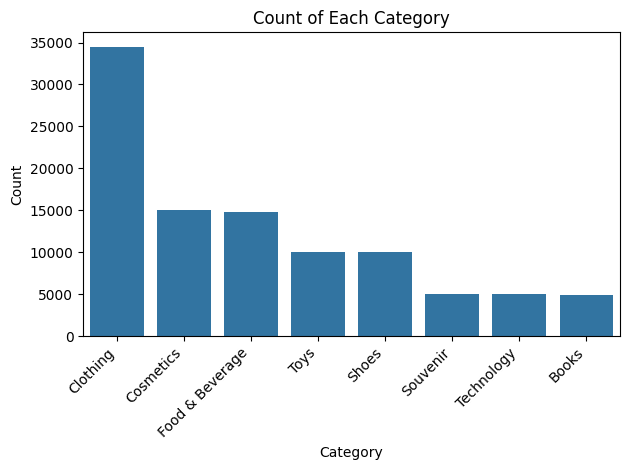

In [235]:
sns.barplot(x=category_count.index, y=category_count.values)
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [236]:
def category_count_value(df):
    return px.bar(x=category_count.index, y=category_count.values,
             labels={'x': 'Category', 'y': 'Count'},
             title='Count of Each Category',
             color=category_count.index,
             color_discrete_sequence=px.colors.qualitative.Set3).update_layout(xaxis_tickangle=-45)

In [237]:
category_count_value(df)

In [238]:
# another plot using plotly just for practice
px.bar(x=category_count.index, y=category_count.values,
             labels={'x': 'Category', 'y': 'Count'},
             title='Count of Each Category',
             color=category_count.index,
             color_discrete_sequence=px.colors.qualitative.Set3).update_layout(xaxis_tickangle=-45)

Text(0.5, 1.0, 'Category count for\xa0each\xa0gender')

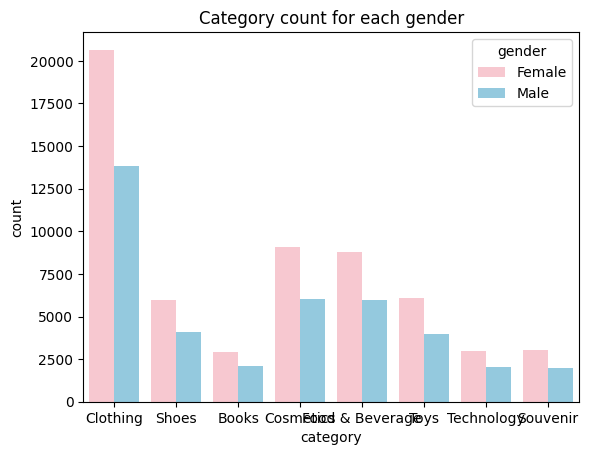

In [239]:
def plt_figure(df):
    return plt.figure(figsize=(15, 8))
sns.countplot(data=df, x=df['category'], hue=df['gender'], palette=['pink','skyblue'])
plt.title('Category count for each gender')

In [240]:
plt_figure(df)

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Category count for\xa0each\xa0gender')

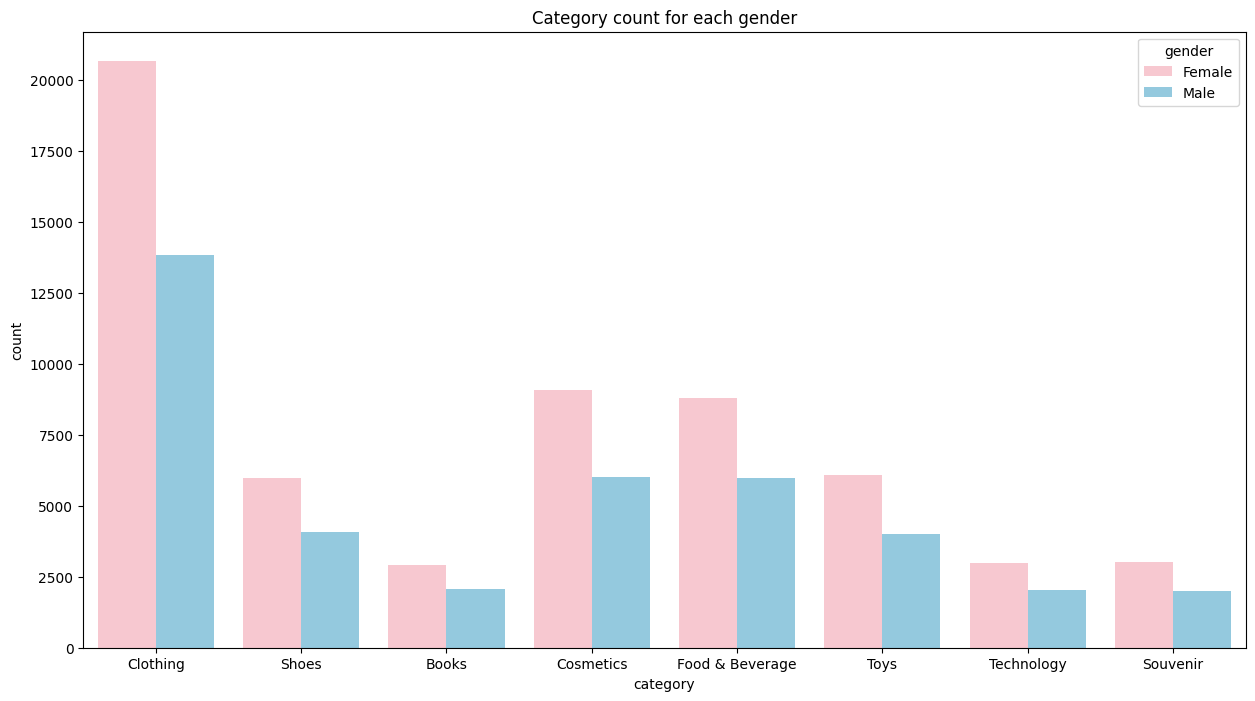

In [241]:
# insights between Category and gender
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x=df['category'], hue=df['gender'], palette=['pink','skyblue'])
plt.title('Category count for each gender')

In [242]:

gender_category_count = df.groupby(['gender', 'category']).size().reset_index(name= 'count')
def category_count_values(df):
    return px.bar(gender_category_count, x='category', y='count', color='gender',
             barmode='group', labels={'category': 'Category', 'count': 'Count'},
             title='Category Count for Each Gender',
             color_discrete_sequence=['pink','skyblue'])

In [243]:
category_count_values(df)

In [244]:
# another plot using plotly just for practice
gender_category_count = df.groupby(['gender', 'category']).size().reset_index(name= 'count')
px.bar(gender_category_count, x='category', y='count', color='gender',
             barmode='group', labels={'category': 'Category', 'count': 'Count'},
             title='Category Count for Each Gender',
             color_discrete_sequence=['pink','skyblue'])

In [245]:
#just showing the data
df

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
customer_id,,,,,,,,,,
C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10
...,...,...,...,...,...,...,...,...,...,...
C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022,9
C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021,9
C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021,3


In [246]:
#knowing how many quantity does the customers buy alot
df['quantity'].value_counts()

quantity
3    20149
5    19990
2    19828
1    19767
4    19723
Name: count, dtype: int64

In [247]:

def category_count_values(df):
    gender_quantity_count = df.groupby(['gender', 'quantity']).size().reset_index(name= 'count')
    return px.bar(gender_quantity_count, x='quantity', y='count', color='gender',
             barmode='group', labels={'quantity': 'Quantity', 'count': 'Count'},
             title='Quantity Count for Each Gender',
             color_discrete_sequence=['pink','skyblue'])

In [248]:
category_count_values(df)

In [249]:
# Plot for knowing what quantity does males and females buy?
gender_quantity_count = df.groupby(['gender', 'quantity']).size().reset_index(name= 'count')
px.bar(gender_quantity_count, x='quantity', y='count', color='gender',
             barmode='group', labels={'quantity': 'Quantity', 'count': 'Count'},
             title='Quantity Count for Each Gender',
             color_discrete_sequence=['pink','skyblue'])

In [250]:
# some information about price column
df['price'].describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64

In [251]:
# Find the index of the row with the maximum price
df_max_price = pd.DataFrame([df.loc[df['price'].idxmax()]])
df_max_price

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
C313348,Male,44,Technology,5,5250.0,Cash,2021-10-26,Kanyon,2021,10


In [252]:
# Find the index of the row with the minimum price
df_min_price = pd.DataFrame([df.loc[df['price'].idxmin()]])
df_min_price

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
C125696,Female,27,Food & Beverage,1,5.23,Cash,2021-05-01,Cevahir AVM,2021,5


In [253]:
#the sum of the prices of whole items
df['price'].sum()

68551365.91

In [254]:
#To know which payment method does customers use more
payment_method_count = df['payment_method'].value_counts()
payment_method_count

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [255]:
def px_pie(df):
    return px.pie(names= payment_method_count.index, values= payment_method_count.values, title= 'Payment Method count')

In [256]:
px_pie(df)

In [257]:
(px.pie(names= payment_method_count.index, values= payment_method_count.values, title= 'Payment Method count'))

In [258]:
def gender_payment_viz(df):
    #Knowing which gender use every payment method more
    gender_payment_count = df.groupby(['gender', 'payment_method']).size().reset_index(name='count')

    fig = px.bar(gender_payment_count, x='payment_method', y='count', color='gender',
                barmode='group', title='Payment Method Distribution by Gender',
                color_discrete_sequence=['pink','skyblue'])
    return

In [259]:
gender_payment_viz(df)

In [260]:
#Knowing which gender use every payment method more
gender_payment_count = df.groupby(['gender', 'payment_method']).size().reset_index(name='count')

px.bar(gender_payment_count, x='payment_method', y='count', color='gender',
             barmode='group', title='Payment Method Distribution by Gender',
             color_discrete_sequence=['pink','skyblue'])

In [261]:
#The most famous mall
mall_count = df['shopping_mall'].value_counts()
mall_count

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [262]:
#The most famous mall
mall_count = df['shopping_mall'].value_counts()
mall_count

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [263]:
def px_bargrapgh(df):
    return px.bar(x=mall_count.index, y=mall_count.values,
                labels={'x': 'Shopping Malls', 'y': 'Count'},
                title='Count of Shopping Malls',
                color=mall_count.index,
                color_discrete_sequence=px.colors.qualitative.Set3).update_layout(xaxis_tickangle=-45)

In [264]:
px_bargrapgh(df)

In [265]:
px.bar(x=mall_count.index, y=mall_count.values,
             labels={'x': 'Shopping Malls', 'y': 'Count'},
             title='Count of Shopping Malls',
             color=mall_count.index,
             color_discrete_sequence=px.colors.qualitative.Set3).update_layout(xaxis_tickangle=-45)

In [266]:
#The anual income for every year
year_count = df['year'].value_counts()
year_count

year
2022    45551
2021    45382
2023     8524
Name: count, dtype: int64

In [267]:
px.pie(names= year_count.index, values= year_count.values, title= 'Anual income')